<span style="font-size:5em;"><strong>EDA Notebook: Spotify Songs Dataset</strong></span>

see https://www.kaggle.com/c/bfh-spotify-challenge/data?select=test.csv

In this session, we explore the Spotify songs dataset. We are interested in learning about interesting patterns, and what makes a song more likely to be popular. 

# Technical setting

In [ ]:
!pip install pd-explain

# <span style="font-size:1.5em;"><strong>Typical EDA Workflow</strong></span>



importing the Pandas and PD-Explain libraries:

In [1]:
import pandas as pd
import pd_explain

usetex-False
(CVXPY) Mar 07 05:59:02 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 07 05:59:02 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


the Spotify songs dataset contains songs from spotify, with various attributes such popularity of the song(between 0-100), main artist of the song, weather it contains explicit lyrics or not, it's year of release etc.

Loading the dataset to a pandas DataFrame using the read_csv() method:

In [2]:
songs_df = pd.read_csv(r"../Datasets/spotify_all.csv")
songs_df

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,main_artist,duration_minutes
0,0.991000,['Mamie Smith'],0.598,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,...,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,1920,10,Mamie Smith,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,...,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,1920,0,Screamin' Jay Hawkins,2.503333
2,0.993000,['Mamie Smith'],0.647,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,...,Golfing Papa,4,0.1740,97.600,0.6890,1920,1920,0,Mamie Smith,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,...,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,1920,10,Oscar Velazquez,7.034783
4,0.295000,['Mixe'],0.704,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,...,Xuniverxe,2,0.0768,122.076,0.2990,1920,1920,0,Mixe,2.753733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,...,The One,0,0.0356,125.972,0.1860,2020,2020,0,DJ Combo,2.460250
174385,0.795000,['Alessia Cara'],0.429,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,...,A Little More,0,0.0360,94.710,0.2280,2021,2020,0,Alessia Cara,2.412000
174386,0.806000,['Roger Fly'],0.671,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,...,Together,0,0.0282,108.058,0.7140,2020,2020,0,Roger Fly,3.635783
174387,0.920000,['Taylor Swift'],0.462,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,...,champagne problems,69,0.0377,171.319,0.3200,2021,2020,60,Taylor Swift,4.066667


Applying a filter operation, to only select popular songs-  with popularity greater than 65:

In [3]:
popular_songs_df = songs_df[songs_df['popularity'] > 65]

<span style="font-size:1em;"><strong>It's hard to make sense of this result:</strong></span>


In [4]:
popular_songs_df

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,main_artist,duration_minutes
4262,0.67300,"['Bing Crosby', 'Ken Darby Singers', 'John Sco...",0.317,0.1580,0,4so0Wek9Ig1p6CRCHuINwW,0.353000,9,0.3380,-16.485,...,White Christmas,80,0.0381,130.503,0.247,1942,1940,80,Bing Crosby,2.958000
4662,0.97000,['Judy Garland'],0.156,0.1840,0,030mot3ZKR3oskfMsqDB2R,0.004580,6,0.2600,-14.820,...,Have Yourself A Merry Little Christmas,74,0.0393,180.887,0.107,1944,1940,70,Judy Garland,2.705550
5262,0.79900,['Gene Autry'],0.834,0.3710,0,25leEEaz1gIpp7o21Fqyjo,0.000000,1,0.2750,-11.990,...,Here Comes Santa Claus (Right Down Santa Claus...,73,0.0358,96.628,0.976,1947,1940,70,Gene Autry,2.504450
5662,0.92600,"['Bing Crosby', 'The Andrews Sisters']",0.641,0.4130,0,0cAhE2iDJApegDnVRx6fCK,0.000000,3,0.1910,-5.624,...,Twelve Days Of Christmas,68,0.0435,143.522,0.834,1949,1940,60,Bing Crosby,3.395767
5663,0.99400,"['Erik Satie', 'Philippe Entremont']",0.469,0.0128,0,5NGtFXVpXSvwunEIGeviY3,0.937000,7,0.0941,-36.856,...,Gymnopédie No. 1,68,0.1190,72.765,0.354,1949,1940,60,Erik Satie,3.431117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174183,0.02050,"['RAYE', 'Rudimental']",0.749,0.8200,0,3DTqHfTGj1c6y2gDXsTez4,0.000685,7,0.0775,-6.114,...,Regardless,76,0.0478,120.066,0.534,2020,2020,70,RAYE,3.292883
174185,0.26300,['Jasiah'],0.760,0.7940,1,0IGxkEgMeF1dwOSIj2IUrT,0.003240,10,0.0996,-4.311,...,Crisis,68,0.3440,165.990,0.583,2020,2020,60,Jasiah,1.826583
174187,0.01360,['Playboi Carti'],0.876,0.4920,1,5UusfWUMMLEXLMc1ViNZoe,0.000283,11,0.0678,-8.110,...,@ MEH,70,0.1530,151.044,0.400,2020,2020,70,Playboi Carti,2.779983
174351,0.00984,['Foo Fighters'],0.530,0.7590,0,3NUmUIyzNLBp8bCFMH8Mif,0.000000,7,0.3190,-7.067,...,Waiting On A War,69,0.0351,131.999,0.502,2021,2020,60,Foo Fighters,4.230667


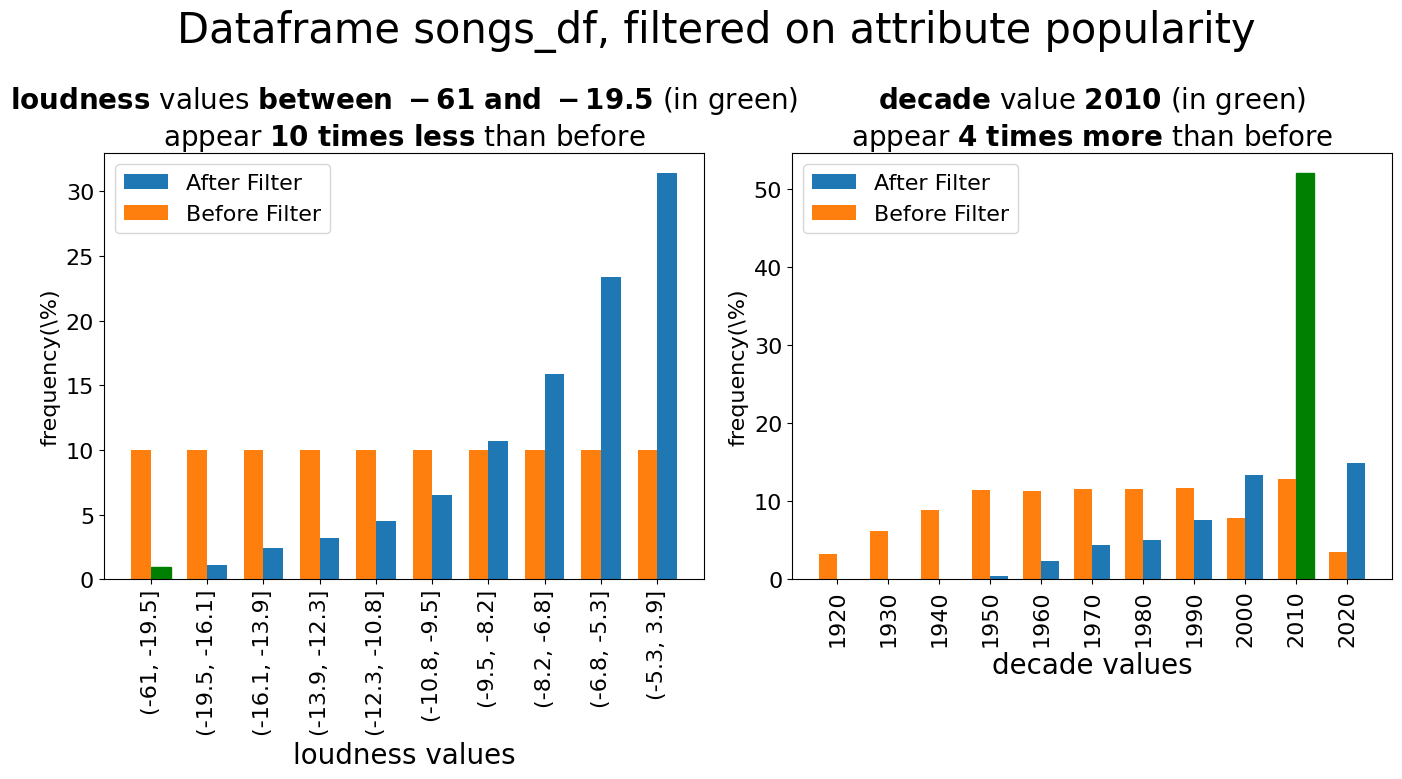

In [5]:
popular_songs_df.explain(top_k = 2)

Applying another filter operation to select newer songs:

In [6]:
new_songs_df = songs_df[songs_df['year'] >= 1990]

Selecting the mean popularity of each decade: 

In [7]:
gb_decade = new_songs_df.groupby('decade')['popularity'].mean()
gb_decade

decade
1990    43.120769
2000    43.167320
2010    29.579203
2020    19.171014
Name: popularity_mean, dtype: float64

<span style="font-size:1em;"><strong>The mean popularity of the 2020s is lower than expected, and might be an outlier. Why?</strong></span>


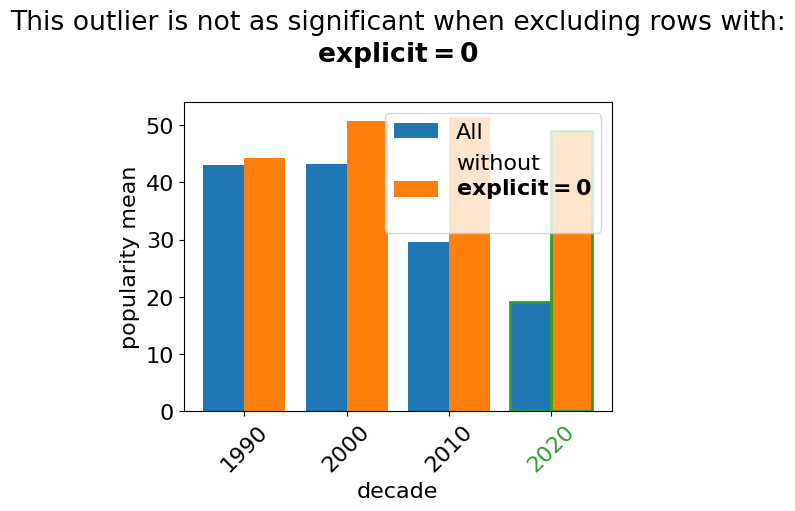

In [8]:
gb_decade.explain(explainer='outlier', target = 2020, dir='low')

## tuple contribution

Data Engineering- adding a column that states if the artist "Metro Boomin" contributed to the creation of the song:

In [9]:
artist = 'Metro Boomin'
def is_by_artist(row):
    list = [a[1:-1] for a in row['artists'][1:-1].split(', ')]
    return True if artist in list else False
songs_df[f'Is By {artist}'] = songs_df.apply(is_by_artist, axis=1)
songs_df[f'Is By {artist}'].value_counts()

Is By Metro Boomin
False    174367
True         22
Name: count, dtype: int64

Applying a filter to only select main artist of songs that were also made by "Metro Boomin" (notice how "Metro Boomin" himself is in that list):

In [10]:
artist_collaborators = songs_df[songs_df[f'Is By {artist}'] == True][['main_artist']].drop_duplicates().reset_index(drop=True)
artist_collaborators

,main_artist
0,21 Savage
1,Offset
2,Metro Boomin
3,NAV
4,Big Sean
5,James Blake


To measure which artist is responsible for Metro Boomin's success (in terms of popularity), we join "artist_collaborators" with the songs where Metro Boomin have participated.

In [11]:
artist_songs_collabs = artist_collaborators.join(songs_df[songs_df[f'Is By {artist}'] == True], on='main_artist', how='inner')
artist_songs_collabs

,index,main_artist,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,duration_minutes,Is By Metro Boomin
0,0,21 Savage,0.373000,"['21 Savage', 'Metro Boomin', 'Future']",0.835,0.413,1,6fwdbPMwP1zVStm8FybmkO,0.001330,1,...,X (feat. Future),72,0.3960,149.004,0.1110,2016,2010,70,4.314667,True
1,0,21 Savage,0.007480,"['21 Savage', 'Metro Boomin']",0.819,0.626,1,5SWnsxjhdcEDc7LJjq9UHk,0.101000,10,...,Runnin,84,0.2020,143.010,0.4150,2020,2020,80,3.265100,True
2,0,21 Savage,0.231000,"['21 Savage', 'Metro Boomin', 'Drake']",0.647,0.667,1,4Q34FP1AT7GEl9oLgNtiWj,0.000000,5,...,Mr. Right Now (feat. Drake),82,0.3040,172.080,0.7040,2020,2020,80,3.230650,True
3,0,21 Savage,0.136000,"['21 Savage', 'Metro Boomin']",0.906,0.444,1,4gmmRb6bZJffOOiww1JGTO,0.000064,4,...,No Heart,71,0.3840,140.063,0.6780,2016,2010,70,3.917333,True
4,0,21 Savage,0.331000,"['21 Savage', 'Offset', 'Metro Boomin', 'Travi...",0.782,0.436,1,5u6vkDnOyaf8LsteDAj2ub,0.000013,2,...,Ghostface Killers,71,0.1550,82.994,0.2430,2017,2010,70,4.482217,True
5,0,21 Savage,0.349000,"['21 Savage', 'Metro Boomin', 'Young Thug']",0.825,0.733,1,3ruoIF2UnoXdzK8mR61ebq,0.000000,1,...,Rich Nigga Shit (feat. Young Thug),76,0.0969,97.974,0.6200,2020,2020,70,3.172183,True
6,0,21 Savage,0.005740,"['21 Savage', 'Metro Boomin']",0.847,0.733,1,6pcywuOeGGWeOQzdUyti6k,0.000010,10,...,Glock In My Lap,75,0.1600,130.029,0.2020,2020,2020,70,3.226517,True
7,0,21 Savage,0.000647,"['21 Savage', 'Metro Boomin']",0.635,0.793,1,3CDVMejYHnB1SkEEx0T1N4,0.747000,10,...,Many Men,72,0.0322,77.594,0.2810,2020,2020,70,3.364267,True
8,0,21 Savage,0.005250,"['21 Savage', 'Offset', 'Metro Boomin', 'Quavo']",0.845,0.399,1,0tdCy39PgWN8LFWu34ORn3,0.740000,1,...,Rap Saved Me,65,0.3090,143.049,0.1480,2017,2010,60,4.293333,True
9,0,21 Savage,0.001630,"['21 Savage', 'Metro Boomin']",0.774,0.706,1,7fxSLnklnayJNBIKntXedZ,0.000001,2,...,Slidin,70,0.3550,152.891,0.3820,2020,2020,70,3.083950,True


Not we check which artist was most significantly responsible for Metro Boomin's success.
1. The most popular collaboration is when featuring on Offset songs:

In [12]:
artist_songs_collabs.groupby('main_artist').popularity.mean()

main_artist
21 Savage       72.818182
Big Sean        64.000000
James Blake     68.000000
Metro Boomin    71.166667
NAV             62.000000
Offset          81.000000
Name: popularity_mean, dtype: float64

2. The most frequent collaboration is when featuring on 21 Savage songs:  

In [13]:
artist_songs_collabs.groupby('main_artist').popularity.count()

main_artist
21 Savage       11
Big Sean         1
James Blake      1
Metro Boomin     6
NAV              2
Offset           1
Name: popularity_count, dtype: int64

<span style="font-size:1em;"><strong>On one hand, collaboration with Offset seems to be the obvious reason for Metro Boomin's success, since it resulted with the most popular result.</strong></span>

<span style="font-size:1em;"><strong>On the other hand, The most frequent collaboration was with 21 Savage, and maybe yielded more popular songs?</strong></span>


In [ ]:
artist_songs_collabs.explain(explainer='shapley', value='mean', attr='popularity', consider='left', top_k=3)

#  <span style="font-size:1.5em;"><strong>PD-Explain- Explaining The Queries</strong></span>

Calling the PD-Explain explain() function, to get explanations for the first filter step:

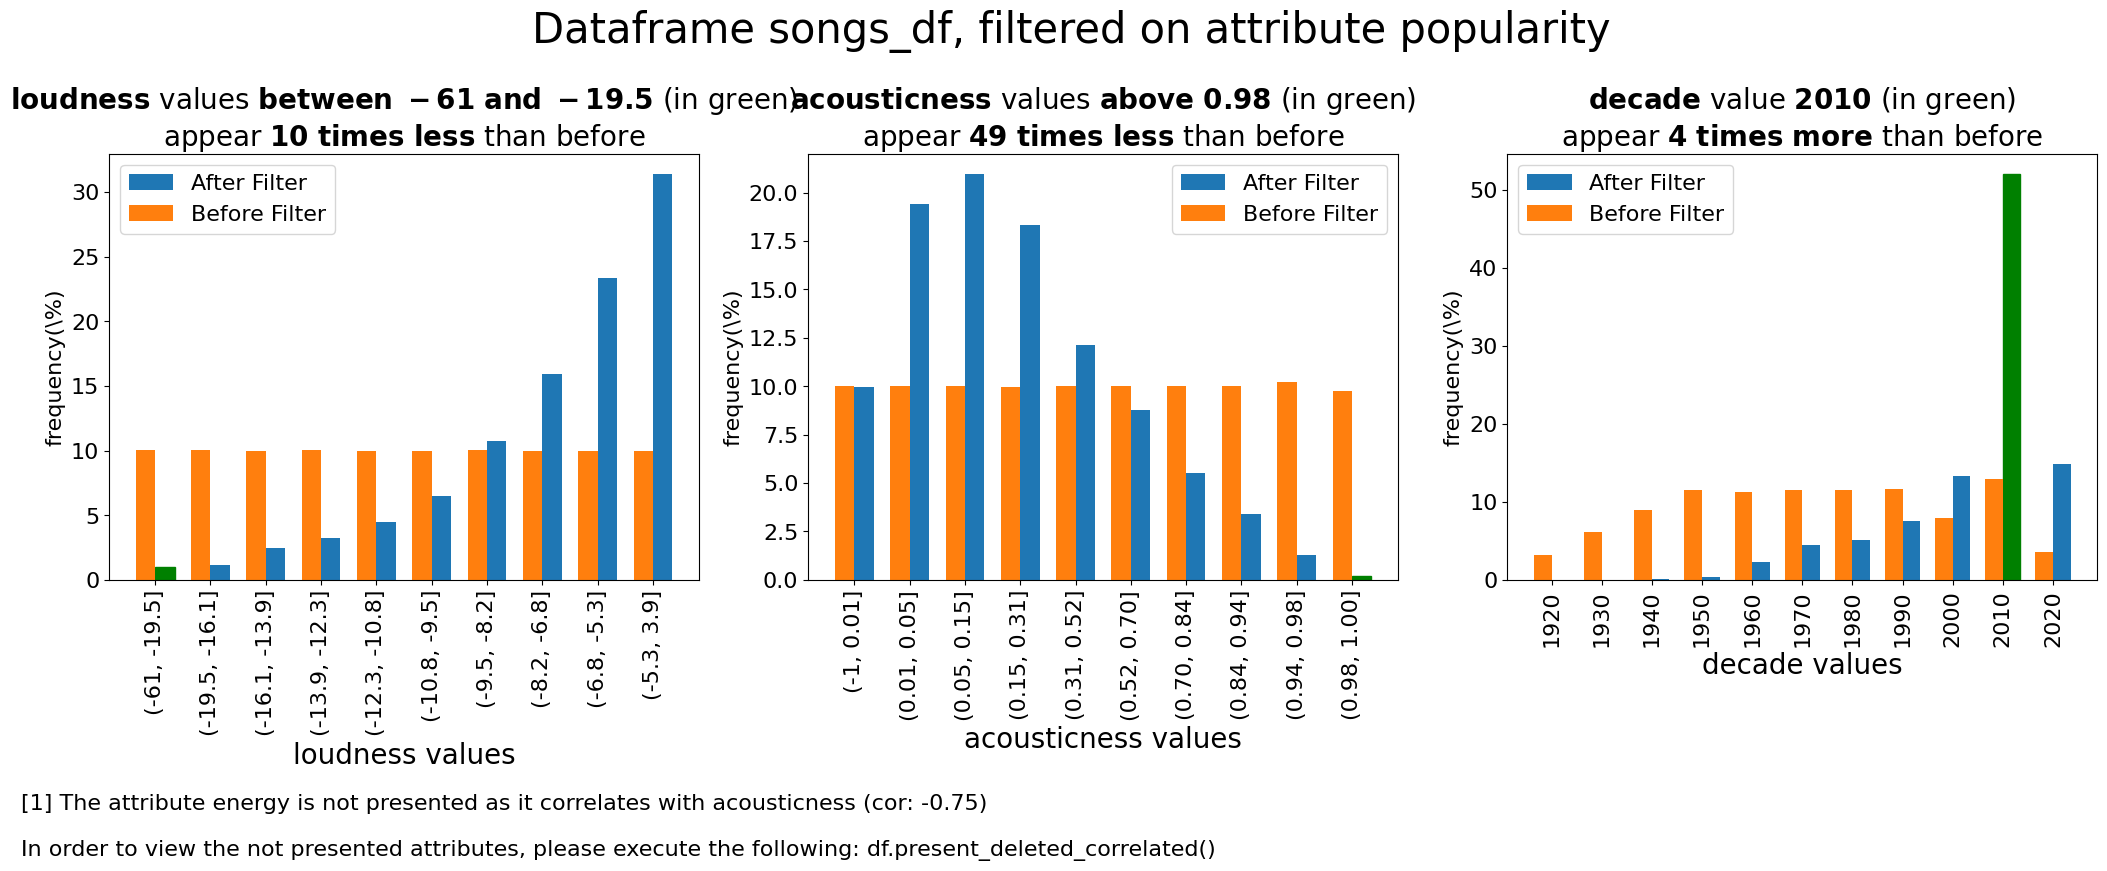

In [15]:
popular_songs_df.explain(top_k = 3, figs_in_row = 3)

Calling the outlier explainer, to get an explanation for the outlier:

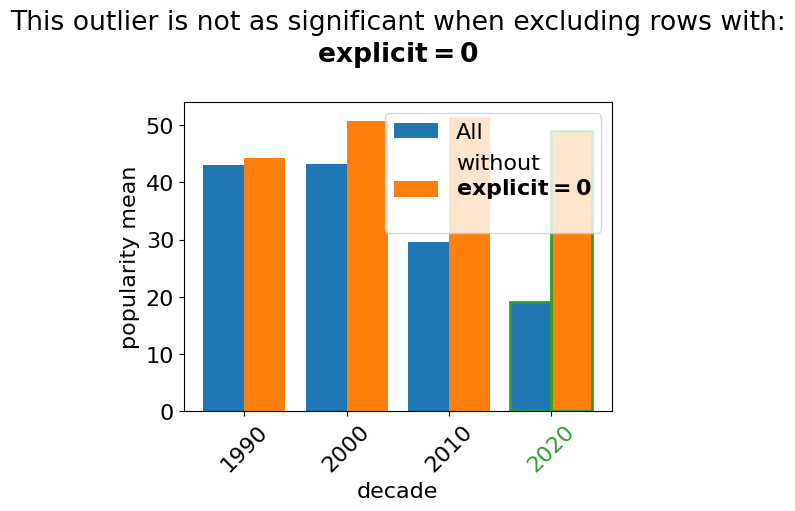

In [16]:
gb_decade.explain(explainer='outlier', target=2020, dir='low')

Behind The Scenes: Notice how PD-Explain keeps track of the operations and steps

In [17]:
print(f'operation type: {popular_songs_df.operation.type}, source DF of operation: {popular_songs_df.operation.source_name}')

operation type: filter, source DF of operation: songs_df
